In [2]:
%run Funcions.ipynb

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
from ipywidgets import interact,IntSlider,widgets
from IPython.display import display

In [4]:
import pandas as pd
import numpy as np

d0 = pd.read_excel('/Users/xaviijordi/Downloads/2010-2012 xavi (1).xlsx')
d1 = pd.read_excel('/Users/xaviijordi/Downloads/2012-2014.xlsx')
d2 = pd.read_excel('/Users/xaviijordi/Downloads/2014-2016.xlsx')
d3 = pd.read_excel('/Users/xaviijordi/Downloads/2016-2018.xlsx')
d4 = pd.read_excel('/Users/xaviijordi/Downloads/2018-2020.xlsx')
d5 = pd.read_excel('/Users/xaviijordi/Downloads/2020-2022.xlsx')
d6 = pd.read_excel('/Users/xaviijordi/Downloads/2022-2024.xlsx')

In [6]:
asme = pd.concat([d0,d1,d2,d3,d4,d5,d6], ignore_index=True)
asme.to_excel("asme.xlsx", index=False) 

In [7]:
asmet = transformar(asme, 2, 0,3)

/Users/xaviijordi/Desktop/Anaconda/anaconda3/lib/python3.12/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [11]:
asmet.info()

<class 'pandas.core.frame.DataFrame'>
Index: 64481 entries, 5 to 84908
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   IdPersona          64481 non-null  int64         
 1   NombreCompleto     64481 non-null  object        
 2   Sexo               64481 non-null  object        
 3   Edad               64481 non-null  int64         
 4   Poblacion          64467 non-null  object        
 5   Provincia          64010 non-null  object        
 6   CodigoPostal       64481 non-null  object        
 7   DireccionCompleta  64481 non-null  object        
 8   TipoAbono          64481 non-null  object        
 9   Categoria          64412 non-null  object        
 10  FechaAltaAbono     64481 non-null  datetime64[ns]
 11  FechaBajaAbono     64481 non-null  datetime64[ns]
 12  SemanaAlta         64481 non-null  int64         
 13  SemanaBaja         64481 non-null  object        
 14  MAlta      

In [13]:
asmet['TempsPerm'].median()

120.0

In [14]:
asmet['CEM'] = np.where(asmet['TipoAbono'].str.contains('VINTRO'), 'VINTRO', np.where(asmet['TipoAbono'].str.contains('VERNEDA'), 'VERNEDA', 'VERNEDA'))

In [15]:
asmet['AnyAlta'] = asmet['FechaAltaAbono'].dt.year
asmet['AnyBaixa'] = asmet['FechaBajaAbono'].dt.year

In [16]:
asmet['AnyBaixa'].value_counts().sort_index()

AnyBaixa
2000       1
2010     208
2011    2522
2012    3855
2013    4414
2014    4443
2015    5296
2016    5703
2017    5321
2018    5927
2019    5678
2020    4931
2021    3789
2022    4489
2023    6220
2024    1683
2025       1
Name: count, dtype: int64

In [35]:
asmet.describe()

,IdPersona,Edad,FechaAltaAbono,FechaBajaAbono,SemanaAlta,MAlta,TempsPerm,AnyAlta,AnyBaixa
count,64481.000000,64481.000000,64481,64481,64481.000000,64481.000000,64481.000000,64481.000000,64481.000000
mean,182342.074720,43.705371,2017-06-19 17:32:48.300739840,2018-01-13 13:38:27.079604992,26.871187,6.567144,207.837254,2016.973062,2017.552504
min,2388.000000,3.000000,1999-09-14 00:00:00,2000-08-23 00:00:00,1.000000,1.000000,1.000000,1999.000000,2000.000000
25%,87861.000000,32.000000,2014-07-02 00:00:00,2015-02-05 00:00:00,14.000000,3.000000,53.000000,2014.000000,2015.000000
50%,221781.000000,42.000000,2017-06-20 00:00:00,2018-01-17 00:00:00,28.000000,7.000000,120.000000,2017.000000,2018.000000
75%,233647.000000,53.000000,2020-07-01 00:00:00,2021-01-01 00:00:00,40.000000,9.000000,267.000000,2020.000000,2021.000000
max,421718.000000,104.000000,2024-04-01 00:00:00,2025-05-01 00:00:00,53.000000,12.000000,1414.000000,2024.000000,2025.000000
std,81601.586577,16.080216,NaN,NaN,14.728352,3.380680,242.045633,3.761921,3.668533


## Pequeño estudio de realtas

In [38]:
asmet['ReAlta'].value_counts()

ReAlta
No    37671
Si    26810
Name: count, dtype: int64

In [40]:
print(len(asmet.loc[asmet['ReAlta']=='Si'])/len(asmet)*100)

41.578139296847134


In [42]:
vec_homes = asmet.loc[asmet['Sexo']=='Hombre']['ReAlta'].value_counts().sort_index()
vec_dones = asmet.loc[asmet['Sexo']=='Mujer']['ReAlta'].value_counts().sort_index()

In [43]:
vec_dones

ReAlta
No    19541
Si    14256
Name: count, dtype: int64

In [50]:
q3 = asmet['TempsPerm'].quantile(0.75)
asmet_perm = asmet.loc[asmet['TempsPerm']>q3]
asmet_perm['ReAlta'].value_counts()

ReAlta
No    9456
Si    6636
Name: count, dtype: int64

In [52]:
asmere = asmet.loc[asmet['ReAlta']== 'Si']

# Estudio desde el inicio hasta el 31 de diciembre de 2023

# Integrar gràfiques interactives aquí 

In [58]:
def histoperm(min_mes,max_mes,any_):
    asmfiltrat = asmet.loc[(asmet['MAlta'] <= max_mes) & (asmet['MAlta'] >= min_mes) & (asmet['AnyAlta'] == any_)]
    print("Mostra = ", len(asmfiltrat))
    print("Mitja = ", asmfiltrat['TempsPerm'].median())
    sns.histplot(data=asmfiltrat, x='TempsPerm', bins='auto')
    plt.xlim(0, 650)
    plt.title("Gràfica de Permanència per data d'alta")
    plt.show()


interact(
  
    histoperm,
    any_=widgets.Dropdown(options=asmet['AnyAlta'].unique(), description='Any'),
    min_mes=IntSlider(value=1, min=1, max=12, step=1, description="Mes Mínim"),
    max_mes=IntSlider(value=12, min=1, max=12, step=1, description="Mes Máxim")
    
)

interactive(children=(IntSlider(value=1, description='Mes Mínim', max=12, min=1), IntSlider(value=12, descript…

<function __main__.histoperm(min_mes, max_mes, any_)>

### Unificamos media de permanencia por centro, género y rango de edad!

In [60]:
def centregen(centre, genere,min_age,max_age):
    asmfiltrat = asmet[(asmet['Sexo']==genere)&(asmet['CEM']==centre)&(asmet["Edad"] >= min_age)&(asmet["Edad"] <= max_age)]
    print("Mostra = ", len(asmfiltrat))
    print('Mitja = ',asmfiltrat['TempsPerm'].median())
    sns.histplot(data=asmfiltrat, x='TempsPerm', bins='auto')
    plt.xlim(0, 650)
    plt.title("Gràfica de Permanència per data d'alta")
    plt.show()
    
    

interact(
    centregen,
    centre=widgets.Dropdown(options=asmet['CEM'].unique(), description='Centro'),
    genere=widgets.Dropdown(options=asmet['Sexo'].unique(), description='Género'),
    min_age=IntSlider(value=18, min=18, max=60, step=1, description="Edad Mínima"),
    max_age=IntSlider(value=60, min=18, max=60, step=1, description="Edad Máxima")
    
)

interactive(children=(Dropdown(description='Centro', options=('VERNEDA', 'VINTRO'), value='VERNEDA'), Dropdown…

<function __main__.centregen(centre, genere, min_age, max_age)>

## Estudio por edades en Vintró

In [36]:
labels = ['3-15','16-25','26-35','36-45','46-55','56-65','65+']

**Edades en general**

**Media de hombres**

In [49]:
asmet_2[(asmet_2['CEM']=='VERNEDA')&(asmet_2['Sexo']=='Hombre')]['TempsPerm'].median()

114.0

## Estudio por edades en Verneda

**Edades en general**

La media de permanencia del grupo 3-15 años es 110.0 

La media de permanencia del grupo 16-25 años es 96.0 

La media de permanencia del grupo 26-35 años es 101.0 

La media de permanencia del grupo 36-45 años es 103.0 

La media de permanencia del grupo 46-55 años es 122.5 

La media de permanencia del grupo 56-65 años es 134.0 

La media de permanencia del grupo 65+ años es 173.0 



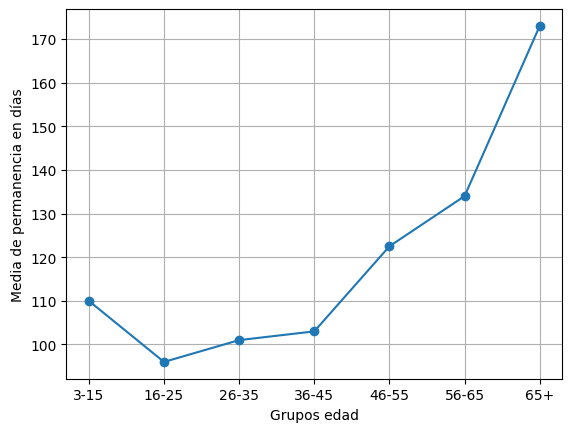

In [50]:
cond = (asmet_2['CEM']=='VERNEDA')
bucle_edad(asmet_2,cond,5)

**Edades por hombre**

La media de permanencia del grupo 3-15 años es 115.5 

La media de permanencia del grupo 16-25 años es 95.0 

La media de permanencia del grupo 26-35 años es 104.5 

La media de permanencia del grupo 36-45 años es 110.0 

La media de permanencia del grupo 46-55 años es 134.5 

La media de permanencia del grupo 56-65 años es 122.0 

La media de permanencia del grupo 65+ años es 152.0 



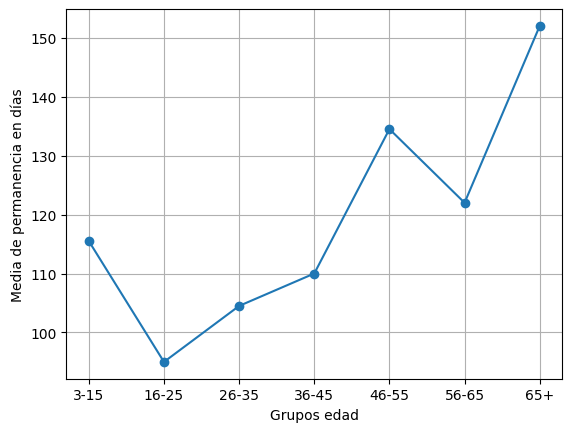

In [51]:
cond = (asmet_2['CEM']=='VERNEDA')&(asmet_2['Sexo']=='Hombre')
bucle_edad(asmet_2,cond,6)

**Edades por mujer**

La media de permanencia del grupo 3-15 años es 91.0 

La media de permanencia del grupo 16-25 años es 96.0 

La media de permanencia del grupo 26-35 años es 98.0 

La media de permanencia del grupo 36-45 años es 91.5 

La media de permanencia del grupo 46-55 años es 119.0 

La media de permanencia del grupo 56-65 años es 148.5 

La media de permanencia del grupo 65+ años es 184.0 



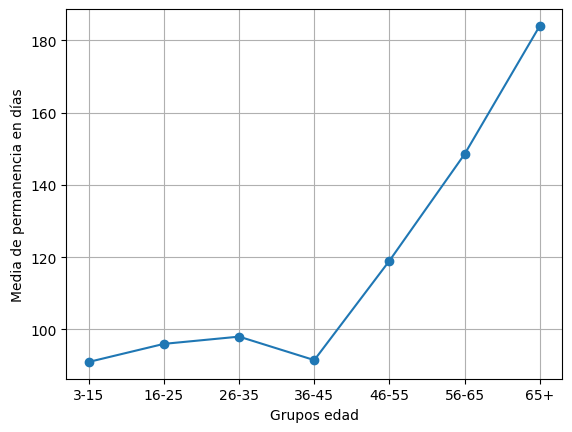

In [52]:
cond = (asmet_2['CEM']=='VERNEDA')&(asmet_2['Sexo']=='Mujer')
bucle_edad(asmet_2,cond,7)

In [53]:
asmet_2['Categoria'].unique()

array(['02 - ADULT', '03 - GENT GRAN', '01 - INFANTIL', nan], dtype=object)

## Estudio por categorías i tipo de abono

**Media por categoria**

In [54]:
for cat in asmet_2['Categoria'].unique():
    if(isinstance(cat, float) and np.isnan(cat)):
        continue
    print("La media de permanencia de la categoría", cat ,"es", asmet_2[(asmet_2['Categoria']== cat)]['TempsPerm'].median(),"\n")

La media de permanencia de la categoría 02 - ADULT es 103.0 

La media de permanencia de la categoría 03 - GENT GRAN es 181.0 

La media de permanencia de la categoría 01 - INFANTIL es 49.5 



**Media por tipo abono**

In [55]:
def bucle_abonos(data,condicio,n,t):
    x = []
    y = []
    for ed in sorted(data['TipoAbono'].unique()):
        x.append(ed)
        y.append(data.loc[(data['TipoAbono']==ed)& condicio]['TempsPerm'].median())
        print("La media de permanencia del abono", ed ," es", y[-1],"amb",len(data.loc[(data['TipoAbono']==ed)& condicio]) ,"abonats\n")
        
    sorted_pairs = sorted(zip(x, y), key=lambda pair: pair[1])
    sorted_x, sorted_y = zip(*sorted_pairs)
    plt.figure(figsize=(10, 6))    
    plt.bar(sorted_x, sorted_y)
    plt.xticks(fontsize=8)
    plt.xlabel('Abonos')
    plt.ylabel('Media de permanencia en días')
    plt.title(f'Permanencia por tipo de abono{t}')
    plt.xticks(rotation = 85)
    plt.grid(True)
    plt.tight_layout()
    plt.savefig(f'Gràfica abonaments{n}.png')
    plt.show()

In [56]:
asmet_2.loc[asmet_2['TipoAbono']=='QA VINTRO MONOPARENTAL']

,IdPersona,NombreCompleto,Sexo,Edad,Poblacion,Provincia,CodigoPostal,DireccionCompleta,TipoAbono,Categoria,...,SemanaAlta,SemanaBaja,MAlta,Mbaja,ReAlta,TempsPerm,Grups_edat,CEM,AnyAlta,AnyBaixa
38493,200792,"ARXE PAGUINA, ANNA",Mujer,26,BARCELONA,BARCELONA,08018,"CARRER 34063, 37 3º",QA VINTRO MONOPARENTAL,02 - ADULT,...,10,22,2,6,Si,465,26-35,VINTRO,2017,2018
38689,202753,"CARREIRA COEDO, ESPERANZA",Mujer,55,BARCELONA,BARCELONA,08018,"GR.V. CORTS CATALANES, 867 4º4º",QA VINTRO MONOPARENTAL,02 - ADULT,...,37,19,9,5,Si,613,56-65,VINTRO,2017,2019
38725,203326,"CARRION HINOJOSA, ISABEL",Mujer,48,BARCELONA,BARCELONA,08018,"AVINGUDA . MERIDIANA, 94 6º 2º",QA VINTRO MONOPARENTAL,02 - ADULT,...,5,9,2,3,No,28,46-55,VINTRO,2018,2018
39179,209590,"MORENO VAZQUEZ, ESTEFANIA",Mujer,55,BARCELONA,BARCELONA,08018,"PLAÇA DEL MERCAT, 20 4º",QA VINTRO MONOPARENTAL,02 - ADULT,...,23,45,6,11,No,881,56-65,VINTRO,2018,2020
39306,211393,"DIAZ CUADRILLERO, ANA MARIA",Mujer,58,BARCELONA,BARCELONA,08026,"CARRER NAVAS DE TOLOSA, 257 1º1º",QA VINTRO MONOPARENTAL,02 - ADULT,...,23,24,6,6,Si,10,56-65,VINTRO,2018,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57187,239761,"ESCRIG MASIP, GEMMA",Mujer,23,BARCELONA,BARCELONA,08026,"CARRER VALENCIA, 606 1º1º",QA VINTRO MONOPARENTAL,02 - ADULT,...,12,27,3,7,No,102,16-25,VINTRO,2019,2019
57381,239983,"GARCIA NOGUE , NURIA",Mujer,51,BARCELONA,BARCELONA,08016,"CARRER escultor ordoñez, 32 2º4º",QA VINTRO MONOPARENTAL,02 - ADULT,...,18,23,4,6,No,399,46-55,VINTRO,2019,2020
57382,239984,"ANNUNZIATA GARCIA, JULIA",Mujer,20,BARCELONA,BARCELONA,08016,"CARRER escultor ordoñez, 32 2º4º",QA VINTRO MONOPARENTAL,02 - ADULT,...,18,23,4,6,No,399,16-25,VINTRO,2019,2020
57431,240024,"HORRILLO GARNELO, MERCEDES",Mujer,55,BARCELONA,BARCELONA,08020,"GR. VIA c.catalanes, 1162 8º1º",QA VINTRO MONOPARENTAL,02 - ADULT,...,18,44,5,11,No,549,56-65,VINTRO,2019,2020


La media de permanencia del abono ABONAMENT MENSUAL TIR AMB ARC  es 92.5 amb 80 abonats

La media de permanencia del abono ASSUMPTES SOCIALS MENSUAL VERNEDA  es 192.0 amb 68 abonats

La media de permanencia del abono QA VERNEDA CAP DE SETMANA  es 3.0 amb 1 abonats

La media de permanencia del abono QA VERNEDA COMPLERT  es 263.5 amb 24 abonats

La media de permanencia del abono QA VERNEDA MIGDIA  es 21.0 amb 1 abonats

La media de permanencia del abono QA VINTRO CAP DE SETMANA  es 45.0 amb 7 abonats

La media de permanencia del abono QA VINTRO COMPLERT  es 310.0 amb 57 abonats

La media de permanencia del abono QA VINTRO MATINS  es 342.0 amb 45 abonats

La media de permanencia del abono QA VINTRO MIGDIA  es 201.5 amb 10 abonats

La media de permanencia del abono QA VINTRO MONOPARENTAL  es 365.5 amb 80 abonats

La media de permanencia del abono VERNEDA BONO QUINCENAL  es 227.0 amb 1 abonats

La media de permanencia del abono VERNEDA CAP DE SETMANA  es 118.0 amb 158 abonats

La media de p

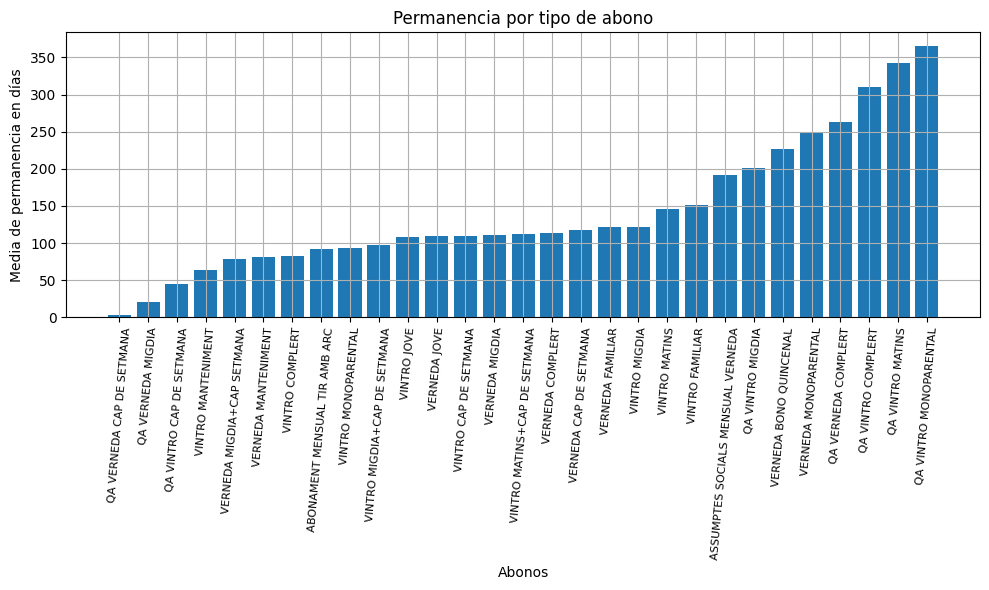

In [57]:
condicio = (5 == 5)
bucle_abonos(asmet_2,condicio,1,'')

## Estudio por categorías i tipo de abono según sexo

### **Estudio de hombres**

**Media por categoria**

In [58]:
for cat in asmet_2['Categoria'].unique():
    if(isinstance(cat, float) and np.isnan(cat)):
        continue
    print("La media de permanencia de la categoría", cat ,"en hombres es", asmet_2[(asmet_2['Categoria']== cat)&(asmet_2['Sexo']== 'Hombre')]['TempsPerm'].median(),"\n")

La media de permanencia de la categoría 02 - ADULT en hombres es 103.0 

La media de permanencia de la categoría 03 - GENT GRAN en hombres es 154.0 

La media de permanencia de la categoría 01 - INFANTIL en hombres es 51.0 



**Media por tipo abono**

La media de permanencia del abono ABONAMENT MENSUAL TIR AMB ARC  es 99.5 amb 54 abonats

La media de permanencia del abono ASSUMPTES SOCIALS MENSUAL VERNEDA  es 299.0 amb 38 abonats

La media de permanencia del abono QA VERNEDA CAP DE SETMANA  es 3.0 amb 1 abonats

La media de permanencia del abono QA VERNEDA COMPLERT  es 140.0 amb 16 abonats

La media de permanencia del abono QA VERNEDA MIGDIA  es nan amb 0 abonats

La media de permanencia del abono QA VINTRO CAP DE SETMANA  es 517.5 amb 2 abonats

La media de permanencia del abono QA VINTRO COMPLERT  es 305.0 amb 17 abonats

La media de permanencia del abono QA VINTRO MATINS  es 131.0 amb 6 abonats

La media de permanencia del abono QA VINTRO MIGDIA  es 201.5 amb 6 abonats

La media de permanencia del abono QA VINTRO MONOPARENTAL  es 465.0 amb 16 abonats

La media de permanencia del abono VERNEDA BONO QUINCENAL  es nan amb 0 abonats

La media de permanencia del abono VERNEDA CAP DE SETMANA  es 114.5 amb 88 abonats

La media de perman

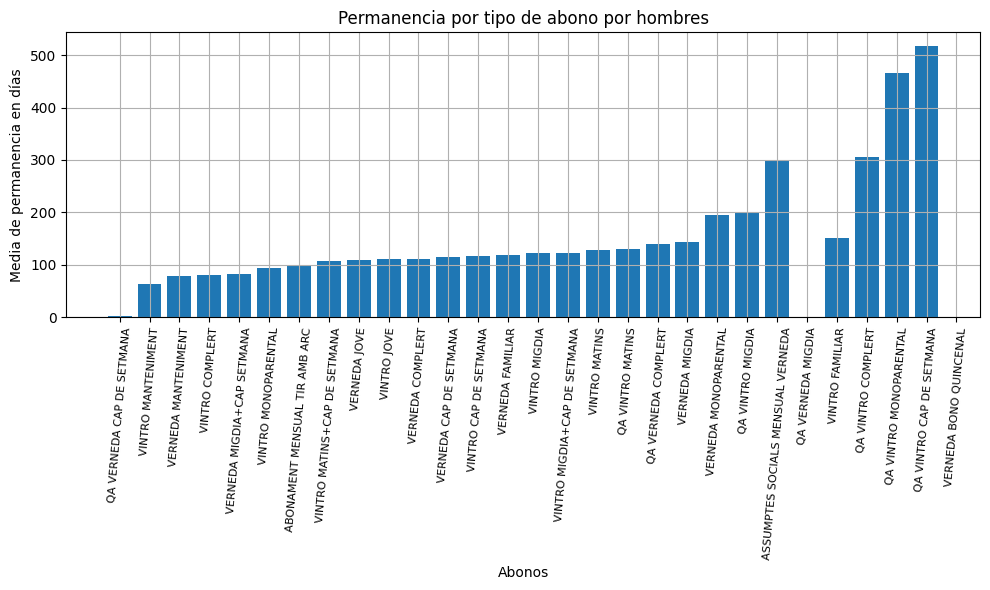

In [59]:
condicio = (asmet_2['Sexo'] == 'Hombre')
bucle_abonos(asmet_2,condicio,2,' por hombres')

### **Estudio de mujeres**

**Media por categoria**

In [60]:
for cat in asmet_2['Categoria'].unique():
    if(isinstance(cat, float) and np.isnan(cat)):
        continue
    print("La media de permanencia de la categoría", cat ,"en mujeres es", asmet_2[(asmet_2['Categoria']== cat)&(asmet_2['Sexo']== 'Mujer')]['TempsPerm'].median(),"\n")

La media de permanencia de la categoría 02 - ADULT en mujeres es 102.0 

La media de permanencia de la categoría 03 - GENT GRAN en mujeres es 189.0 

La media de permanencia de la categoría 01 - INFANTIL en mujeres es 48.0 



**Media por tipo abono**

La media de permanencia del abono ABONAMENT MENSUAL TIR AMB ARC  es 88.5 amb 26 abonats

La media de permanencia del abono ASSUMPTES SOCIALS MENSUAL VERNEDA  es 157.5 amb 30 abonats

La media de permanencia del abono QA VERNEDA CAP DE SETMANA  es nan amb 0 abonats

La media de permanencia del abono QA VERNEDA COMPLERT  es 448.5 amb 8 abonats

La media de permanencia del abono QA VERNEDA MIGDIA  es 21.0 amb 1 abonats

La media de permanencia del abono QA VINTRO CAP DE SETMANA  es 45.0 amb 5 abonats

La media de permanencia del abono QA VINTRO COMPLERT  es 325.0 amb 40 abonats

La media de permanencia del abono QA VINTRO MATINS  es 395.0 amb 39 abonats

La media de permanencia del abono QA VINTRO MIGDIA  es 178.5 amb 4 abonats

La media de permanencia del abono QA VINTRO MONOPARENTAL  es 334.5 amb 64 abonats

La media de permanencia del abono VERNEDA BONO QUINCENAL  es 227.0 amb 1 abonats

La media de permanencia del abono VERNEDA CAP DE SETMANA  es 119.0 amb 70 abonats

La media de perm

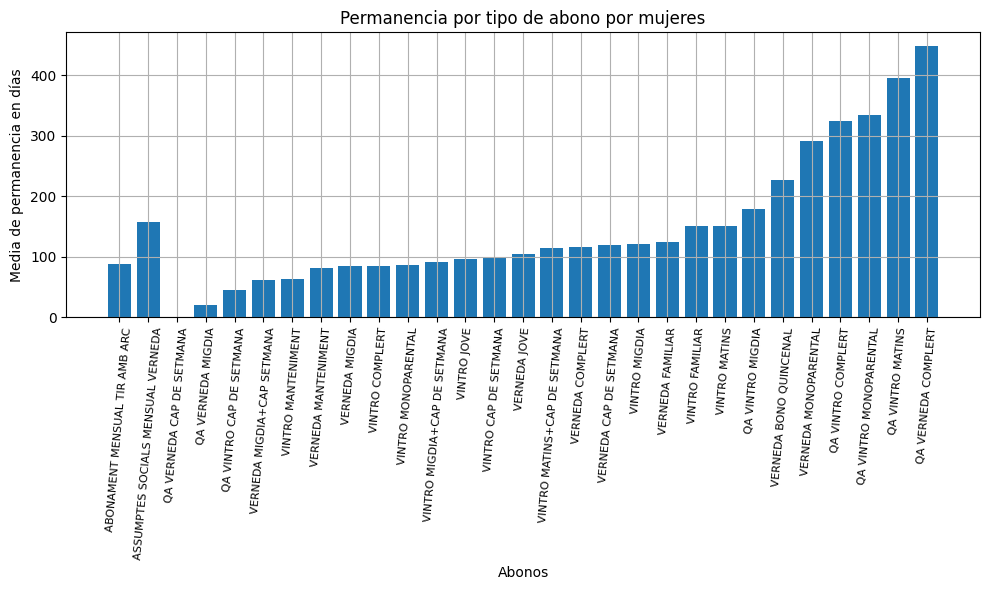

In [61]:
condicio = (asmet_2['Sexo'] == 'Mujer')
bucle_abonos(asmet_2,condicio,3,' por mujeres') 

# Estudio desde enero de 2021 a  diciembre de 2023

In [62]:
asmet_3 = asmet.loc[(asmet['FechaAltaAbono']< '2023-12-31 00:00:00')&(asmet['FechaAltaAbono']> '2022-01-01 00:00:00')]

### **Media de Vintró**

**Media general**

In [63]:
asmet_3[asmet_3['CEM']=='VINTRO']['TempsPerm'].median()

78.0

**Media de mujeres**

In [64]:
asmet_3[(asmet_3['CEM']=='VINTRO')&(asmet_3['Sexo']=='Mujer')]['TempsPerm'].median()

81.0

**Media de hombres**

In [65]:
asmet_3[(asmet_3['CEM']=='VINTRO')&(asmet_3['Sexo']=='Hombre')]['TempsPerm'].median()

74.0

## Estudio por edades en Vintró

**Edades en general**

La media de permanencia del grupo 3-15 años es 81.0 

La media de permanencia del grupo 16-25 años es 82.0 

La media de permanencia del grupo 26-35 años es 62.0 

La media de permanencia del grupo 36-45 años es 77.0 

La media de permanencia del grupo 46-55 años es 87.0 

La media de permanencia del grupo 56-65 años es 86.0 

La media de permanencia del grupo 65+ años es 92.0 



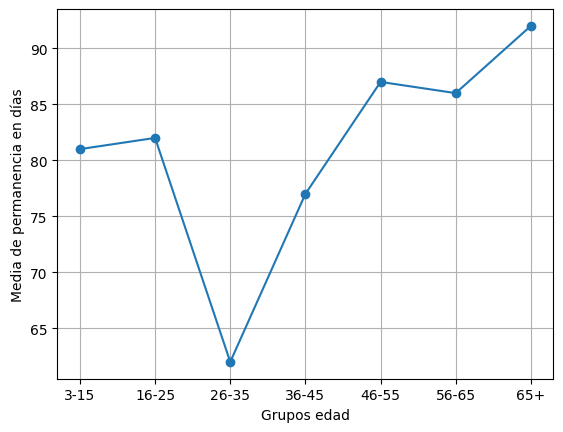

In [66]:
condicio = (asmet_3['CEM']=='VINTRO')
bucle_edad(asmet_3,condicio,10)

**Edades por hombre**

La media de permanencia del grupo 3-15 años es 64.5 

La media de permanencia del grupo 16-25 años es 71.0 

La media de permanencia del grupo 26-35 años es 64.0 

La media de permanencia del grupo 36-45 años es 74.5 

La media de permanencia del grupo 46-55 años es 79.5 

La media de permanencia del grupo 56-65 años es 89.0 

La media de permanencia del grupo 65+ años es 92.0 



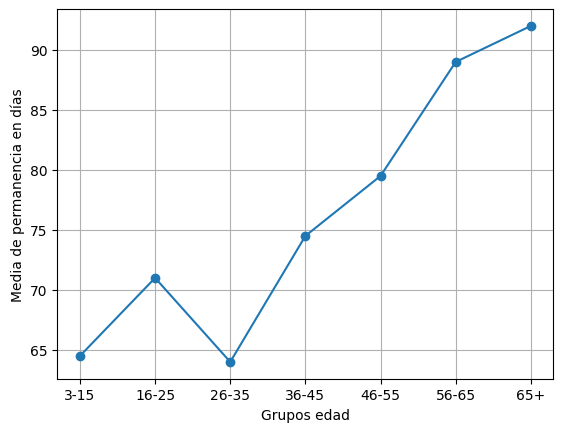

In [67]:
condicio = (asmet_3['CEM']=='VINTRO') & (asmet_3['Sexo']=='Hombre')
bucle_edad(asmet_3,condicio,11)

**Edades por mujer**

La media de permanencia del grupo 3-15 años es 84.5 

La media de permanencia del grupo 16-25 años es 88.5 

La media de permanencia del grupo 26-35 años es 62.0 

La media de permanencia del grupo 36-45 años es 80.0 

La media de permanencia del grupo 46-55 años es 90.0 

La media de permanencia del grupo 56-65 años es 83.5 

La media de permanencia del grupo 65+ años es 92.0 



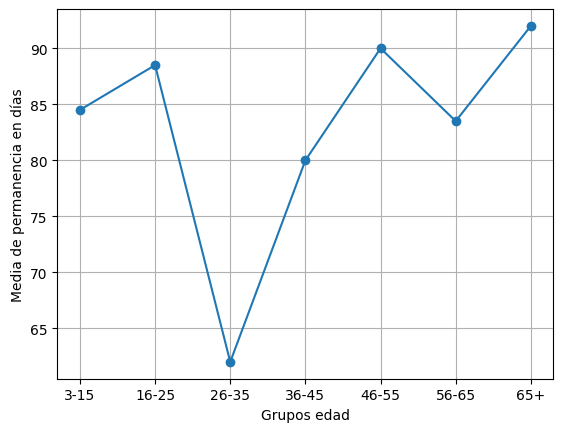

In [68]:
condicio = (asmet_3['CEM']=='VINTRO') & (asmet_3['Sexo']=='Mujer')
bucle_edad(asmet_3,condicio,12)

### **Media de Verneda**

**Media general**

In [69]:
asmet_3[asmet_3['CEM']=='VERNEDA']['TempsPerm'].median()

92.0

**Media de mujeres**

In [70]:
asmet_3[(asmet_3['CEM']=='VERNEDA')&(asmet_3['Sexo']=='Mujer')]['TempsPerm'].median()

94.0

**Media de hombres**

In [71]:
asmet_3[(asmet_3['CEM']=='VERNEDA')&(asmet_3['Sexo']=='Hombre')]['TempsPerm'].median()

90.0

## Estudio por edades en Verneda

**Edades en general**

La media de permanencia del grupo 3-15 años es 72.0 

La media de permanencia del grupo 16-25 años es 91.0 

La media de permanencia del grupo 26-35 años es 84.0 

La media de permanencia del grupo 36-45 años es 85.0 

La media de permanencia del grupo 46-55 años es 107.5 

La media de permanencia del grupo 56-65 años es 96.0 

La media de permanencia del grupo 65+ años es 109.0 



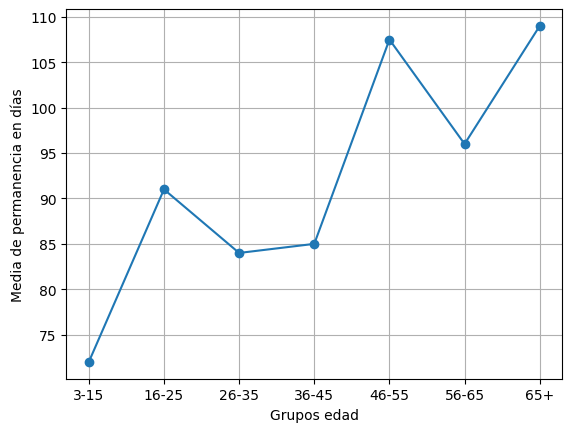

In [72]:
condicio = (asmet_3['CEM']=='VERNEDA')
bucle_edad(asmet_3,condicio,20)

**Edades por hombre**

La media de permanencia del grupo 3-15 años es 71.0 

La media de permanencia del grupo 16-25 años es 89.0 

La media de permanencia del grupo 26-35 años es 86.0 

La media de permanencia del grupo 36-45 años es 79.0 

La media de permanencia del grupo 46-55 años es 103.0 

La media de permanencia del grupo 56-65 años es 87.5 

La media de permanencia del grupo 65+ años es 110.0 



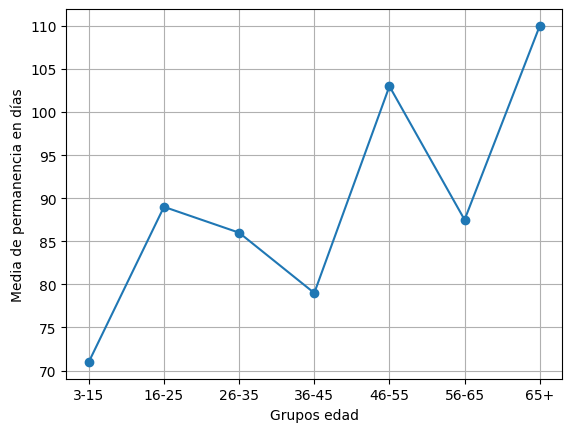

In [73]:
condicio = (asmet_3['CEM']=='VERNEDA') & (asmet_3['Sexo']=='Hombre')
bucle_edad(asmet_3,condicio,21)

**Edades por mujer**

La media de permanencia del grupo 3-15 años es 73.5 

La media de permanencia del grupo 16-25 años es 95.0 

La media de permanencia del grupo 26-35 años es 79.0 

La media de permanencia del grupo 36-45 años es 88.0 

La media de permanencia del grupo 46-55 años es 108.5 

La media de permanencia del grupo 56-65 años es 105.5 

La media de permanencia del grupo 65+ años es 109.0 



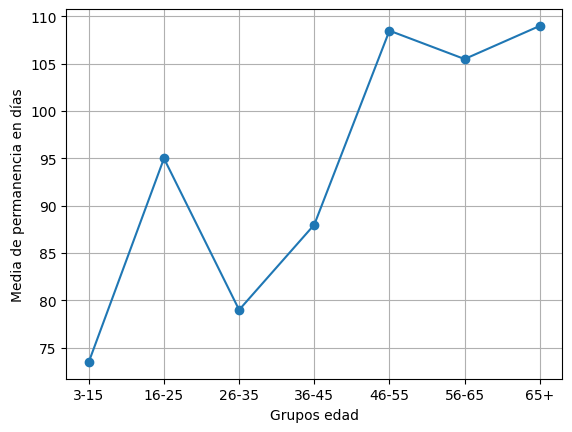

In [74]:
condicio = (asmet_3['CEM']=='VERNEDA') & (asmet_3['Sexo']=='Mujer')
bucle_edad(asmet_3,condicio,22)

**Estudi 56-65 anys**

In [75]:
asmet56 = asmet_3.loc[(asmet_3['Grups_edat']=='56-65')&(asmet_3['CEM']=='VERNEDA')]

In [76]:
asmet_3['Sexo'].value_counts()

Mujer     5293
Hombre    4595
Name: Sexo, dtype: int64

In [77]:
len(asmet_3.loc[asmet_3['Sexo']=='Mujer'])/len(asmet_3)

0.5352953074433657

In [78]:
asmet56.loc[asmet56['Sexo']=='Mujer']['TempsPerm'].median()

105.5

## Estudio por categorías i tipo de abono

**Media por categoria**

In [79]:
for cat in asmet_3['Categoria'].unique():
    if(isinstance(cat, float) and np.isnan(cat)):
        continue
    print("La media de permanencia de la categoría", cat ,"es", asmet_3[(asmet_3['Categoria']== cat)]['TempsPerm'].median(),"\n")

La media de permanencia de la categoría 02 - ADULT es 82.0 

La media de permanencia de la categoría 03 - GENT GRAN es 94.0 

La media de permanencia de la categoría 01 - INFANTIL es 56.0 



**Media por tipo abono**

La media de permanencia del abono GYM ONLINE VINTRO  es 33.0 amb 388 abonats

La media de permanencia del abono ONLINE VERNEDA  es 13.0 amb 17 abonats

La media de permanencia del abono ONLINE VINTRO  es 28.0 amb 326 abonats

La media de permanencia del abono QA VERNEDA COMPLERT  es 138.0 amb 21 abonats

La media de permanencia del abono QA VERNEDA MIGDIA  es 269.0 amb 2 abonats

La media de permanencia del abono QA VINTRO CAP DE SETMANA  es 61.0 amb 1 abonats

La media de permanencia del abono QA VINTRO COMPLERT  es 209.0 amb 29 abonats

La media de permanencia del abono QA VINTRO MATINS  es 123.5 amb 12 abonats

La media de permanencia del abono QA VINTRO MIGDIA  es 226.0 amb 1 abonats

La media de permanencia del abono VERNEDA CAP DE SETMANA  es 78.5 amb 38 abonats

La media de permanencia del abono VERNEDA COMPLERT  es 99.0 amb 1408 abonats

La media de permanencia del abono VERNEDA FAMILIAR  es 105.0 amb 359 abonats

La media de permanencia del abono VERNEDA INTERCENTRE  es 100.0 

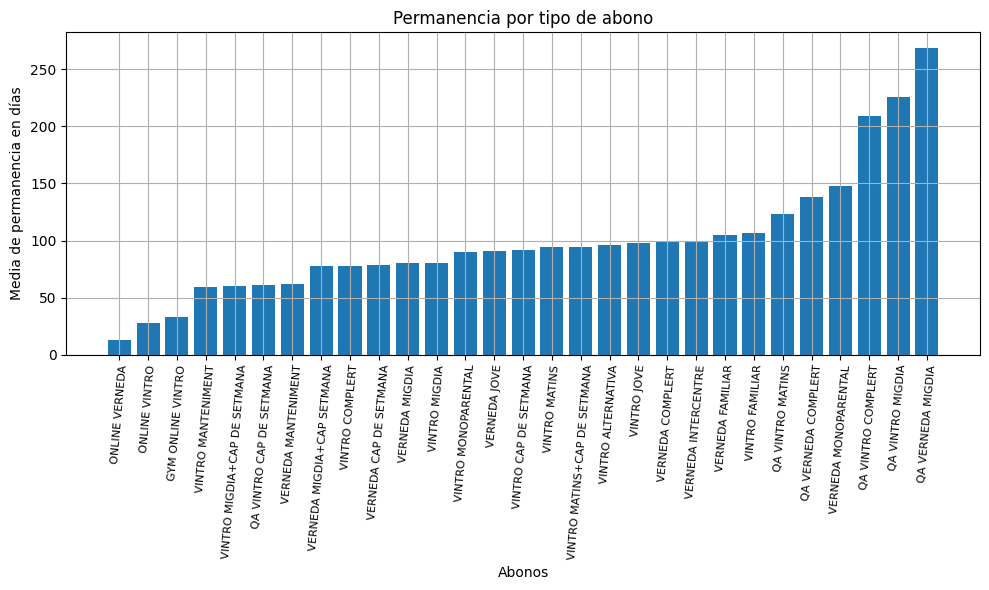

In [80]:
condicio = (0==0)
bucle_abonos(asmet_3,condicio,50,'')

## Estudio por categorías i tipo de abono según sexo

### **Estudio de hombres**

**Media por categoria**

In [81]:
for cat in asmet_3['Categoria'].unique():
    if(isinstance(cat, float) and np.isnan(cat)):
        continue
    print("La media de permanencia de la categoría", cat ,"en hombres es", asmet_3[(asmet_3['Categoria']== cat)&(asmet_3['Sexo']== 'Hombre')]['TempsPerm'].median(),"\n")

La media de permanencia de la categoría 02 - ADULT en hombres es 79.0 

La media de permanencia de la categoría 03 - GENT GRAN en hombres es 94.0 

La media de permanencia de la categoría 01 - INFANTIL en hombres es 46.0 



**Media por tipo abono**

La media de permanencia del abono GYM ONLINE VINTRO  es 31.0 amb 137 abonats

La media de permanencia del abono ONLINE VERNEDA  es 15.0 amb 9 abonats

La media de permanencia del abono ONLINE VINTRO  es 27.0 amb 131 abonats

La media de permanencia del abono QA VERNEDA COMPLERT  es 69.0 amb 12 abonats

La media de permanencia del abono QA VERNEDA MIGDIA  es 235.0 amb 1 abonats

La media de permanencia del abono QA VINTRO CAP DE SETMANA  es 61.0 amb 1 abonats

La media de permanencia del abono QA VINTRO COMPLERT  es 334.0 amb 10 abonats

La media de permanencia del abono QA VINTRO MATINS  es 488.0 amb 1 abonats

La media de permanencia del abono QA VINTRO MIGDIA  es nan amb 0 abonats

La media de permanencia del abono VERNEDA CAP DE SETMANA  es 81.5 amb 12 abonats

La media de permanencia del abono VERNEDA COMPLERT  es 95.0 amb 729 abonats

La media de permanencia del abono VERNEDA FAMILIAR  es 104.0 amb 173 abonats

La media de permanencia del abono VERNEDA INTERCENTRE  es 92.0 amb 18 

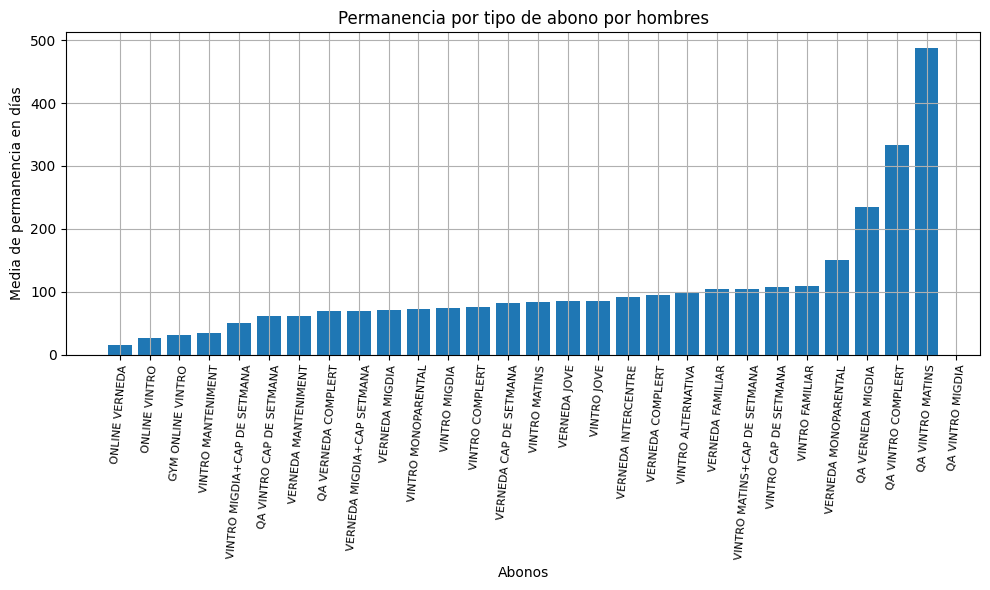

In [82]:
condicio = (asmet_3['Sexo']=='Hombre')
bucle_abonos(asmet_3,condicio,51,' por hombres')

### **Estudio de mujeres**

**Media por categoria**

In [83]:
for cat in asmet_3['Categoria'].unique():
    if(isinstance(cat, float) and np.isnan(cat)):
        continue
    print("La media de permanencia de la categoría", cat ,"en mujeres es", asmet_3[(asmet_3['Categoria']== cat)&(asmet_3['Sexo']== 'Mujer')]['TempsPerm'].median(),"\n")

La media de permanencia de la categoría 02 - ADULT en mujeres es 85.0 

La media de permanencia de la categoría 03 - GENT GRAN en mujeres es 94.5 

La media de permanencia de la categoría 01 - INFANTIL en mujeres es 66.0 



**Media por tipo abono**

La media de permanencia del abono GYM ONLINE VINTRO  es 36.0 amb 251 abonats

La media de permanencia del abono ONLINE VERNEDA  es 10.5 amb 8 abonats

La media de permanencia del abono ONLINE VINTRO  es 28.0 amb 195 abonats

La media de permanencia del abono QA VERNEDA COMPLERT  es 158.0 amb 9 abonats

La media de permanencia del abono QA VERNEDA MIGDIA  es 303.0 amb 1 abonats

La media de permanencia del abono QA VINTRO CAP DE SETMANA  es nan amb 0 abonats

La media de permanencia del abono QA VINTRO COMPLERT  es 122.0 amb 19 abonats

La media de permanencia del abono QA VINTRO MATINS  es 120.0 amb 11 abonats

La media de permanencia del abono QA VINTRO MIGDIA  es 226.0 amb 1 abonats

La media de permanencia del abono VERNEDA CAP DE SETMANA  es 75.5 amb 26 abonats

La media de permanencia del abono VERNEDA COMPLERT  es 102.0 amb 679 abonats

La media de permanencia del abono VERNEDA FAMILIAR  es 105.5 amb 186 abonats

La media de permanencia del abono VERNEDA INTERCENTRE  es 115.0 amb

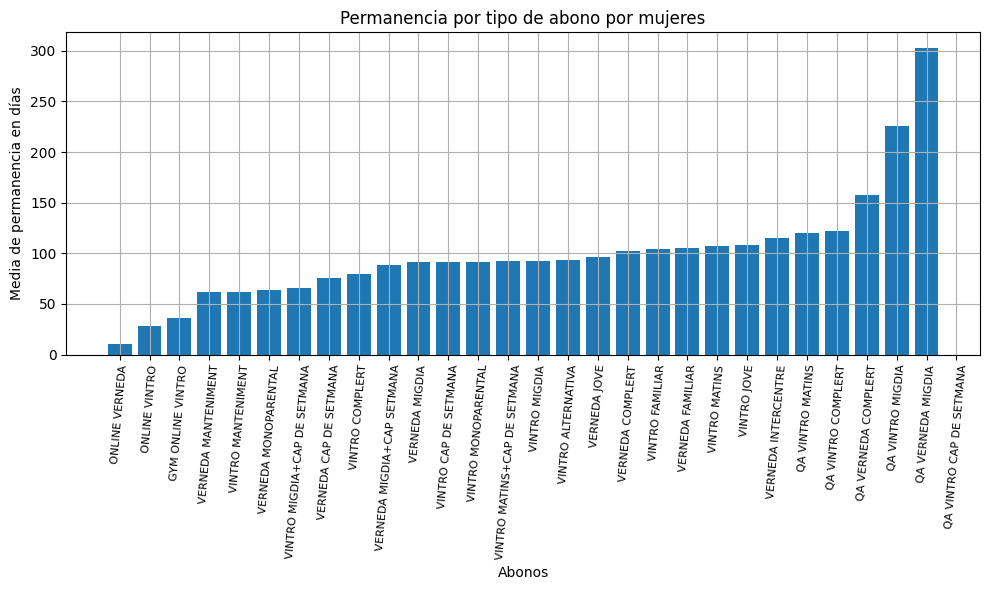

In [84]:
condicio = (asmet_3['Sexo']=='Mujer')
bucle_abonos(asmet_3,condicio,52,' por mujeres')